TURN TO ENGLISH

# Projet : Réimplémentation et Amélioration de l'algorithme RLT (Reinforcement Learning Trees)

**Objectif :** Ce notebook structure le projet de réimplémentation en Python de l'algorithme RLT.

**Auteurs :** Kousay Najar, Hamza Farhani, Taoufik Krid, Wiem Ben M'Sahel, Rawen Mezzi, Mohamed Khayat

**Date :** 11/2025

## Phase 1 : Compréhension du Métier (Business Understanding)

Cette phase a pour but de définir les objectifs du point de vue du métier et de les traduire en un problème de data science bien défini.

# Problem statement & Study of Existing Methods and Limitations & Defining Strategy

### 1. Problem Statement

#### Context and Motivation
The problem addresses high-dimensional sparse settings where traditional tree-based methods like Random Forests show limitations. In scenarios with $p$ variables, only $p_1 \ll p$ strong variables carry the true signal, while $p_2 = p - p_1$ are noise variables.

#### Key Challenges Identified
**Random Feature Selection Limitations:** In high-dimensional settings with many noise variables, random feature selection provides little opportunity to consider strong variables as splitting rules. When $p$ is large and $p_1$ is small, the probability of selecting a strong variable decreases dramatically.

**Terminal Node Degradation:** As sample size decreases toward terminal nodes, identifying important variables becomes increasingly difficult regardless of the model used. This causes splitting variable selection to behave almost randomly, leading to performance similar to purely random forests.

**Hidden Structures:** Marginal comparisons of splitting variables can fail to identify strong variables, especially with structures like the checkerboard pattern where variables show little marginal effect but strong joint effects.

#### Research Objectives
Develop a tree-based method that achieves consistency with convergence rates depending only on $p_1$ (number of strong variables) rather than $p$ (total number of variables). The method should force splits to concentrate on strong variables throughout the tree construction, especially toward terminal nodes.

### 2. Study of Existing Methods and Limitations

#### Traditional Random Forests
**Strengths:** State-of-the-art ensemble method with flexible non-parametric structure and capacity for handling high-dimensional data. Shows great potential in cancer studies with large numbers of genes or SNPs.

**Limitations:**
- Unsatisfactory performance in some studies compared to other machine learning tools
- Random feature selection creates bias in variable importance measures when using small numbers of features
- Using large numbers of predictors causes overfitting toward terminal nodes where sample size is small
- Lack of theoretical attention on sparsity for tree-based methods

#### Alternative Tree-Based Methods
- **Extremely Randomized Trees (ET):** Use random cut points rather than searching for best cut points, achieving similar performance to Random Forests at reduced computational cost.
- **Bayesian Additive Regression Trees (BART):** Integrate tree-based methods into a Bayesian framework.
- **Purely Random Forests:** Provide friendly framework for theoretical analysis but are extremely inefficient because most splits select noise variables, especially in sparse settings.

#### Linear Models
- **Lasso and Penalized Methods:** Among the most popular methods for identifying signal variables in linear models. However, they cannot capture complex non-linear and interaction effects that tree-based methods can handle.

#### Theoretical Gaps
- **Consistency Issues:** The asymptotic behavior of random forests relies heavily on the particular splitting rule implemented. Some greedy construction rules demonstrate inconsistency under certain conditions.
- **No Method with Both Properties:** Up to now, there appears to be no tree-based method possessing both established theoretical validity and excellent practical performance.

### 3. Defining Strategy

#### Three-Fold Innovation Approach

**Strategy 1: Reinforcement Learning for Splitting**
- **Mechanism:** At each internal node, fit an embedded model to evaluate the potential contribution of each variable. Select variables that bring the greatest future improvement in later splits rather than choosing those with largest marginal effect from immediate split.
- **Implementation:** Use a modified version of Extremely Randomized Trees as the embedded model at each node. Calculate Variable Importance (VI) measures by randomly permuting values of each variable in out-of-bag data and measuring MSE increase.
- **Expected Benefit:** This "look-ahead" approach can break hidden structures and force splits on strong variables even when they show no marginal effect (e.g., checkerboard pattern). Enables linear combination cuts at little extra computational cost.

**Strategy 2: Progressive Variable Muting**
- **Mechanism:** Progressively eliminate noise variables during construction of each individual tree. Define a muted set $P_d(A)$ of variables removed from consideration and a protected set $P_0(A)$ of variables always kept in the model.
- **Muting Rate Parameter $p_d$:**
    - $p_d = 0$: No muting
    - $p_d = 0.5 |P \setminus P_d(A)|$: Moderate muting (suitable for most situations)
    - $p_d = 0.8 |P \setminus P_d(A)|$: Aggressive muting
- **Expected Benefit:** Prevents noise variables from being considered in the search for splitting rules, so that toward terminal nodes where sample size is small, splitting rules are still constructed from only strong variables. Forces a certain level of sparsity in constructed trees.

**Strategy 3: Linear Combination Splits**
- **Mechanism:** Use variables with large VI to construct splitting rules of the form $X\beta = 0$, where $\beta$ is a coefficient vector. The coefficient for variable $j$ at node $A$ is defined as:
    $$ \beta_j(A) = \text{sign}(\rho_A(X_j, Y)) \times VI_A(j) $$
    if $VI_A(j) > \gamma \times \max_j VI_A(j)$ and variable is among top $k$ variables.
- **Parameters:**
    - $k$: Maximum number of variables in linear combination (default tested: 1, 2, 5)
    - $\gamma$: Minimal variable importance threshold (recommended: 0.25)
- **Expected Benefit:** Gains efficiency when there is local linear structure. Introduces extra randomness within the set of strong variables due to complex neighborhood structure, helping preserve randomness under the greedy splitting approach.

#### Theoretical Foundation
- **Convergence Rate:** Under basic assumptions, RLT achieves convergence rate depending only on $p_1$ (number of strong variables), not $p$ (total variables).
- **Probability of Correct Selection:** With probability close to 1, the method always selects a strong variable as the splitting variable:
    $$ P(\xi_A \in S) \geq 1 - C_1 e^{-\Theta_1(n_A/n)\Theta_2(n_A/n)n^{\epsilon_p(A)}K_1} $$

#### Validation Strategy
- **Synthetic Data:** Test on four simulation scenarios representing different aspects:
    - Classification with independent covariates
    - Non-linear models with independent covariates
    - Checkerboard-like models with strong correlation
    - Linear models with correlation
- **Real Data:** Validate on 10 benchmark datasets from UCI Machine Learning Repository.
- **Comparison Baseline:** Compare against Random Forests, BART, Lasso, Gradient Boosting, and Extremely Randomized Trees.

### 1.1 Objectifs Métier (Business Objectives - BOs)
Les BOs décrivent la valeur ajoutée attendue d'un point de vue non technique.

- **BO1 :  Reimplementer la strategie.** definire strategie (RLT)

- **BO 2 : Comparer les solutions classiques et notre solution.** 

- **BO3 : Rendre les décisions de la strategie explicables .** 

- **BO4 : Optimiser la strategie.**

### 1.2 Objectifs Data Science (Data Science Objectives - DSOs)
Les DSOs sont les objectifs techniques qui, une fois atteints, permettront de réaliser les BOs.

- **DSO1 : Implémenter l'algorithme Reinforcement Learning Trees (RLT).** 

- **DSO2 : Effectuer une etude comparative entre le modele RLT et les methodes classiques.** 

- **DSO3 : Expliquer les predictions du modele en utilisant les methodes XAI.** 

- **DSO4 : Optimiser le modele RLT.**

## Phase 2 : Compréhension des Données (Data Understanding)



Number of Lignes is : 569


Number of Columns is : 31


Qualitatives Columns are : 


Quantatatives Columns are : 
radius1
texture1
perimeter1
area1
smoothness1
compactness1
concavity1
concave_points1
symmetry1
fractal_dimension1
radius2
texture2
perimeter2
area2
smoothness2
compactness2
concavity2
concave_points2
symmetry2
fractal_dimension2
radius3
texture3
perimeter3
area3
smoothness3
compactness3
concavity3
concave_points3
symmetry3
fractal_dimension3

The Target is : Diagnosis


No missing values


No duplicated values


Outliers detected in the following 29 features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'symmetry3', 'fractal_dimension3']


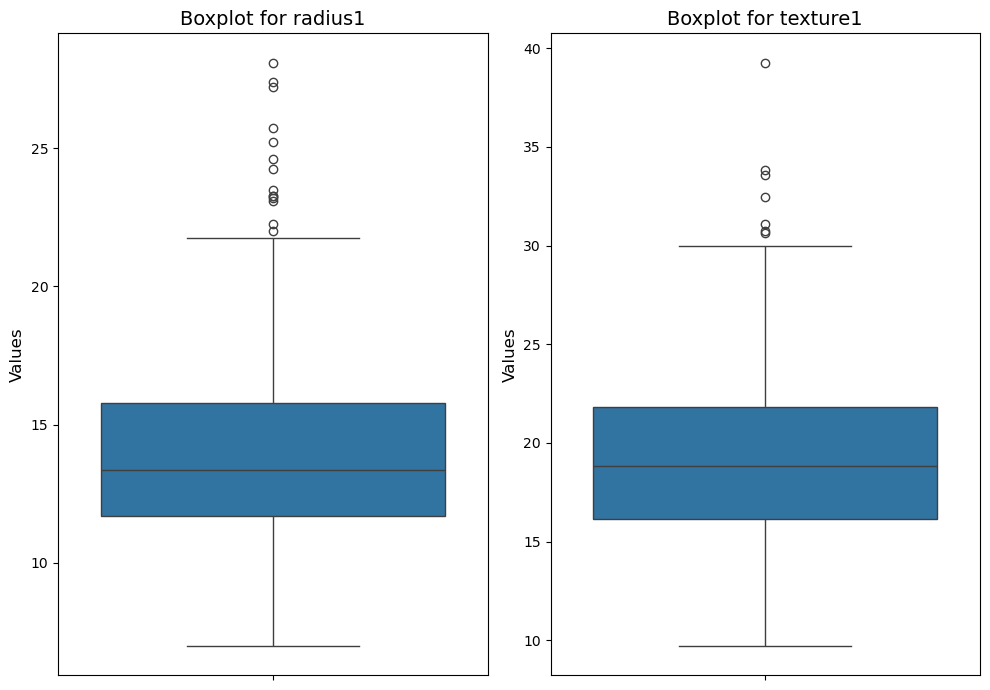

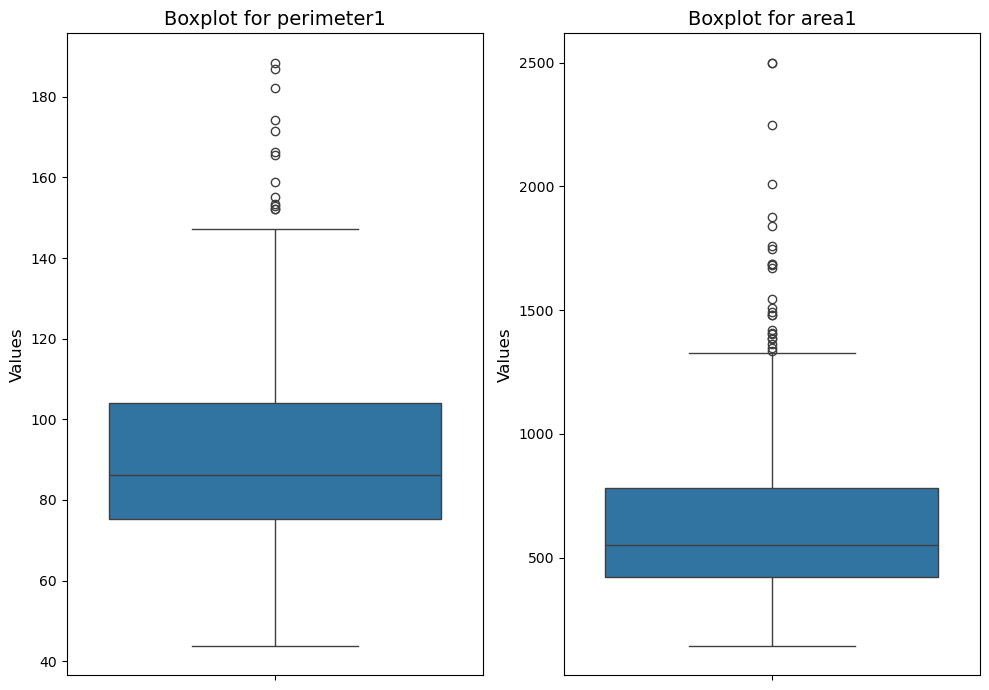

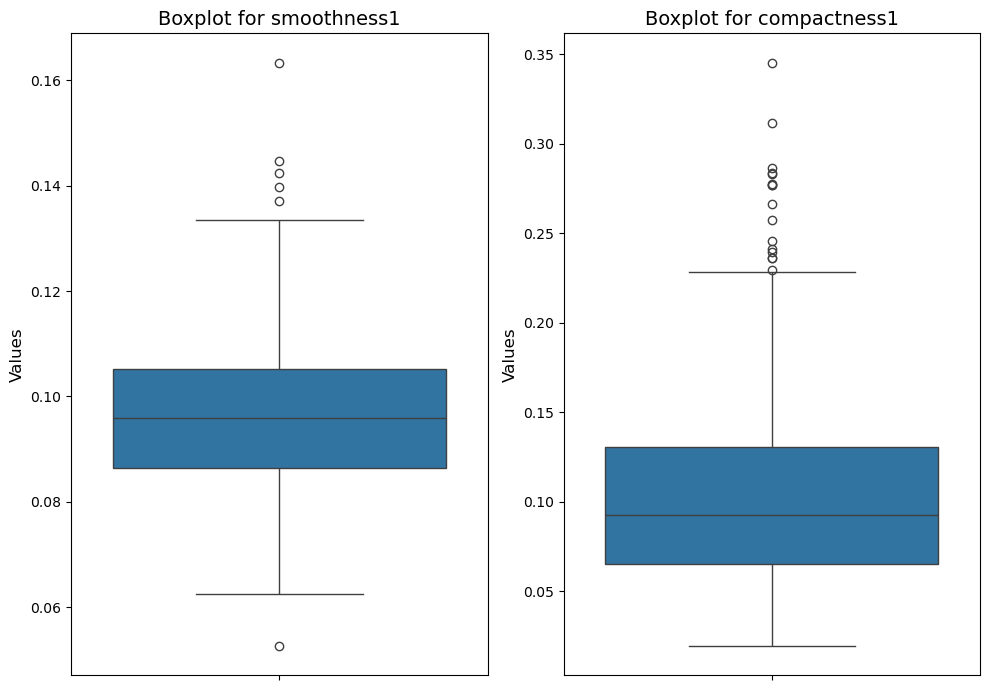

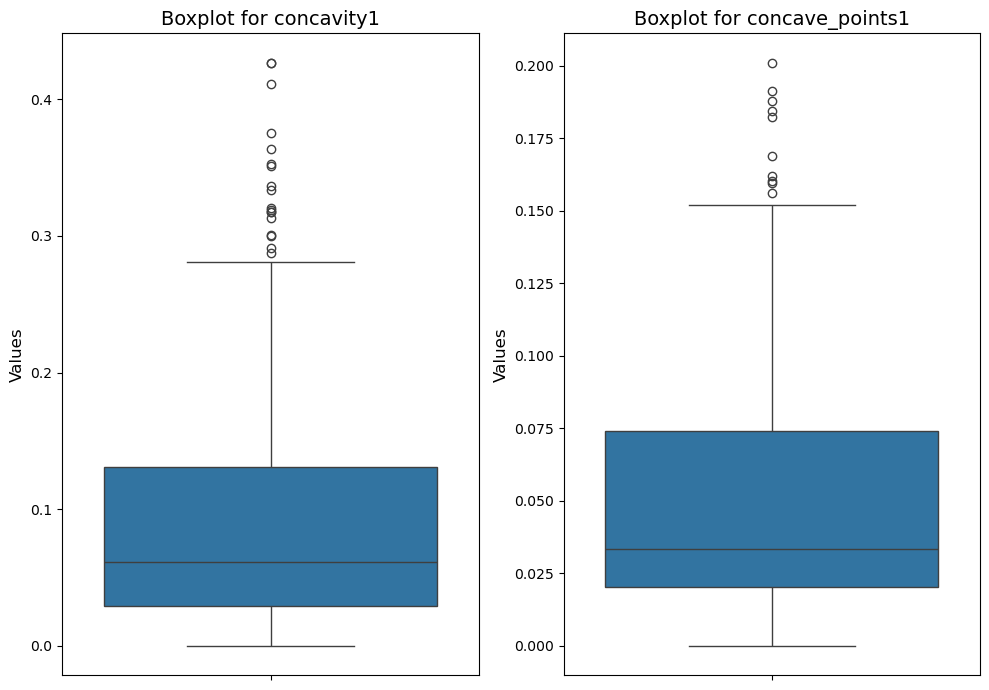

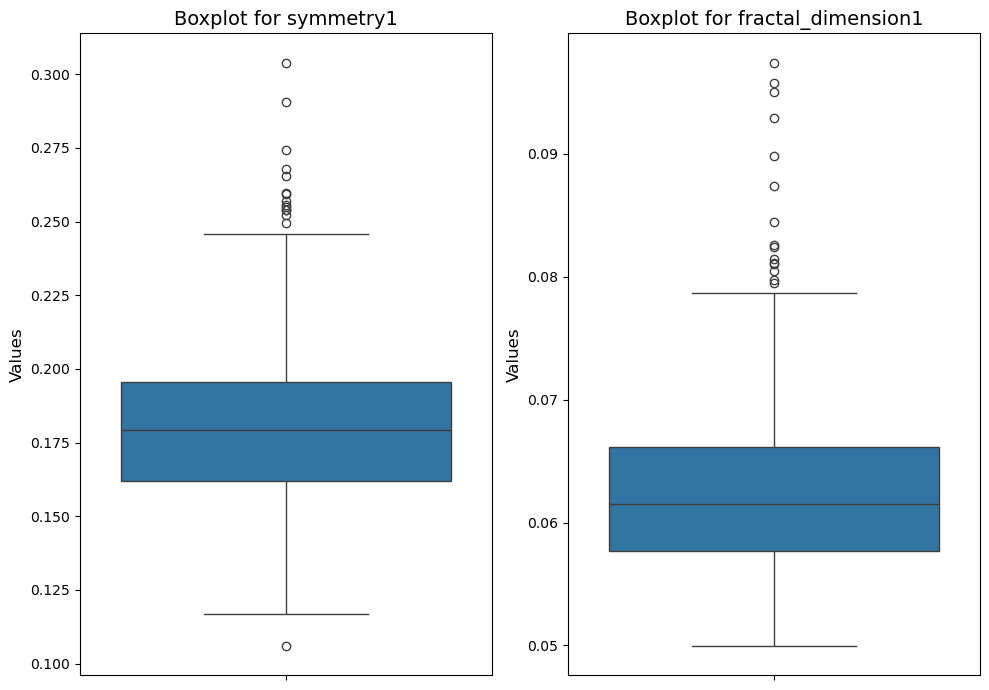

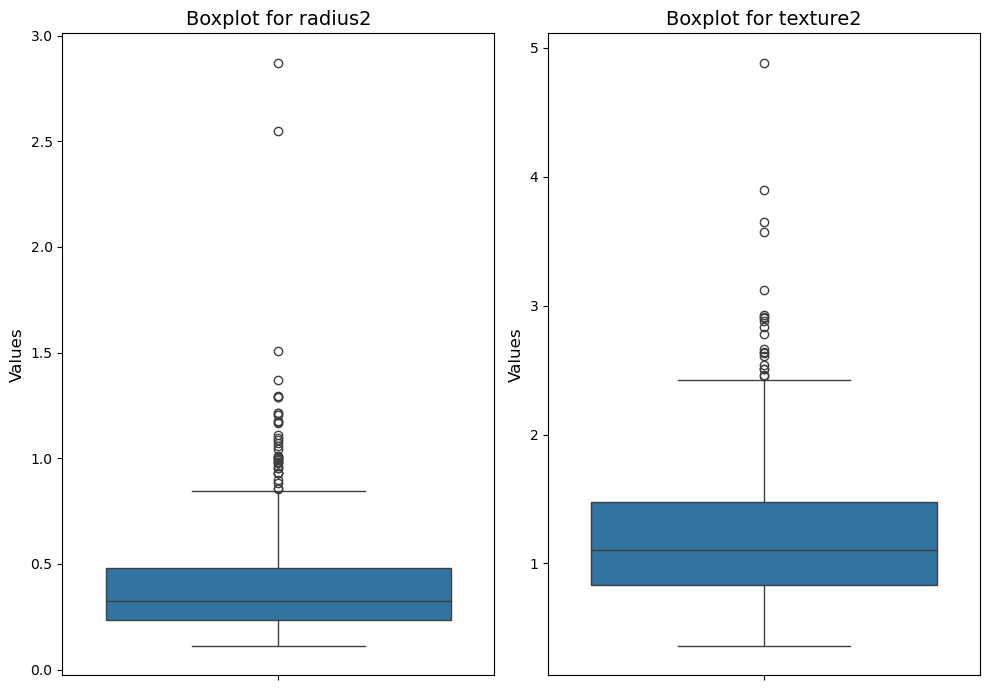

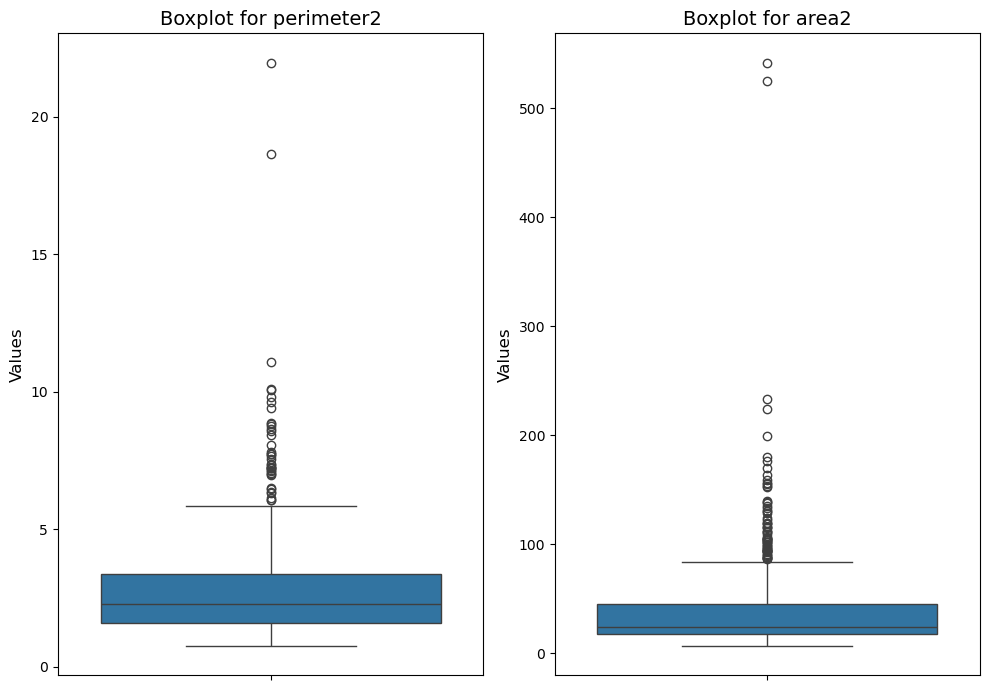

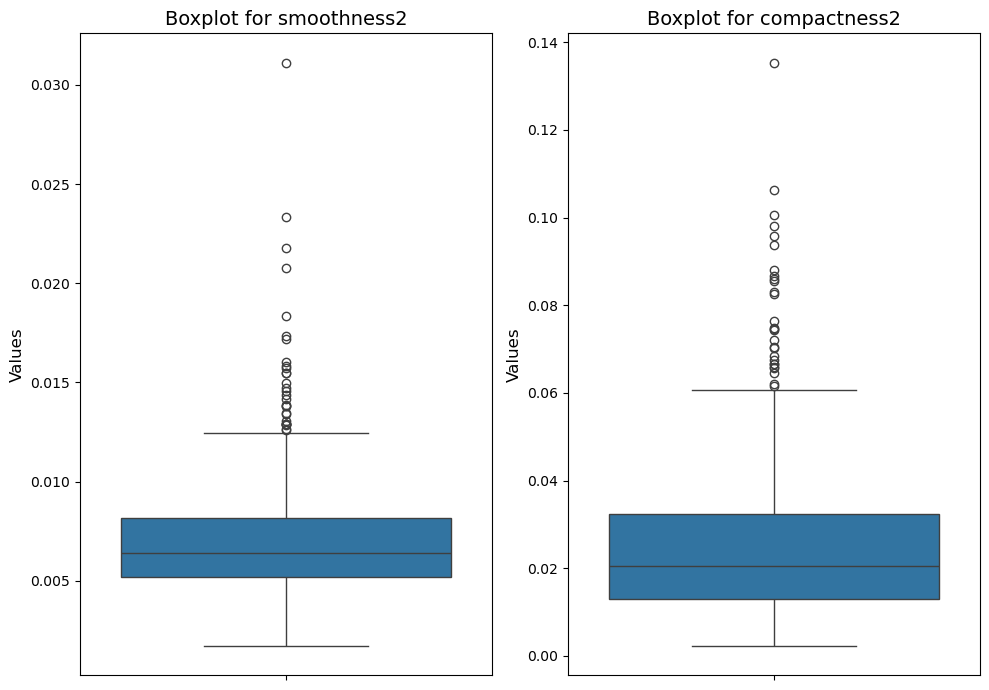

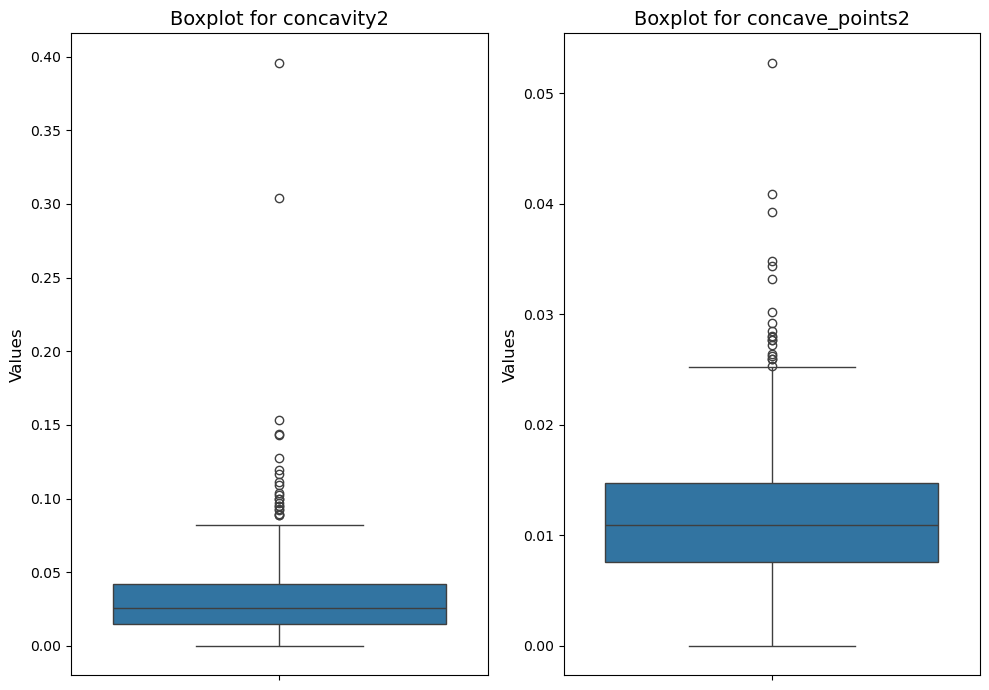

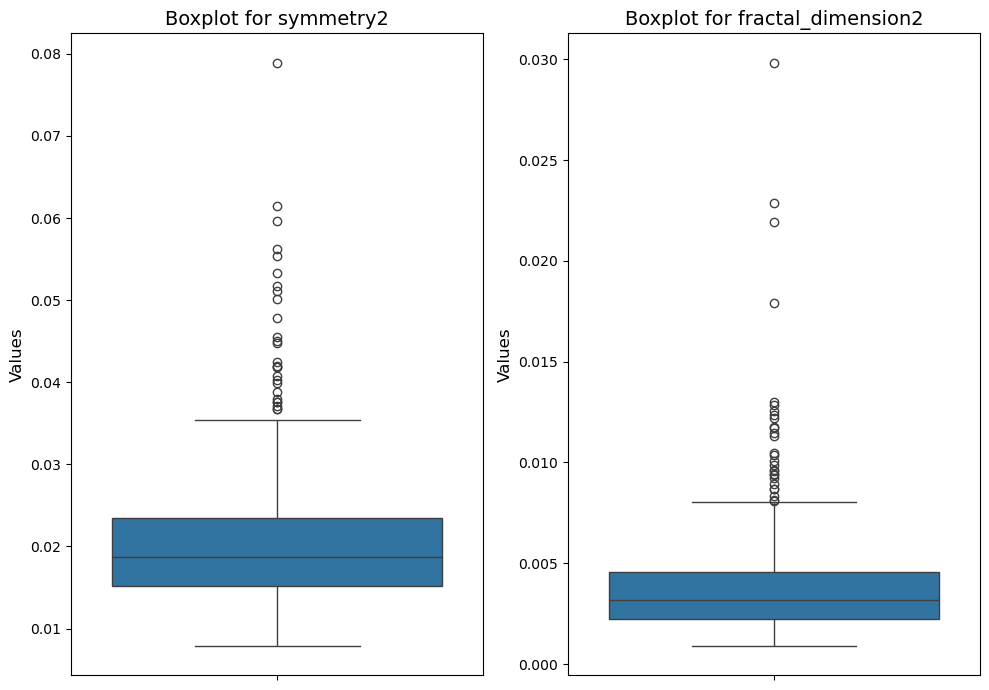

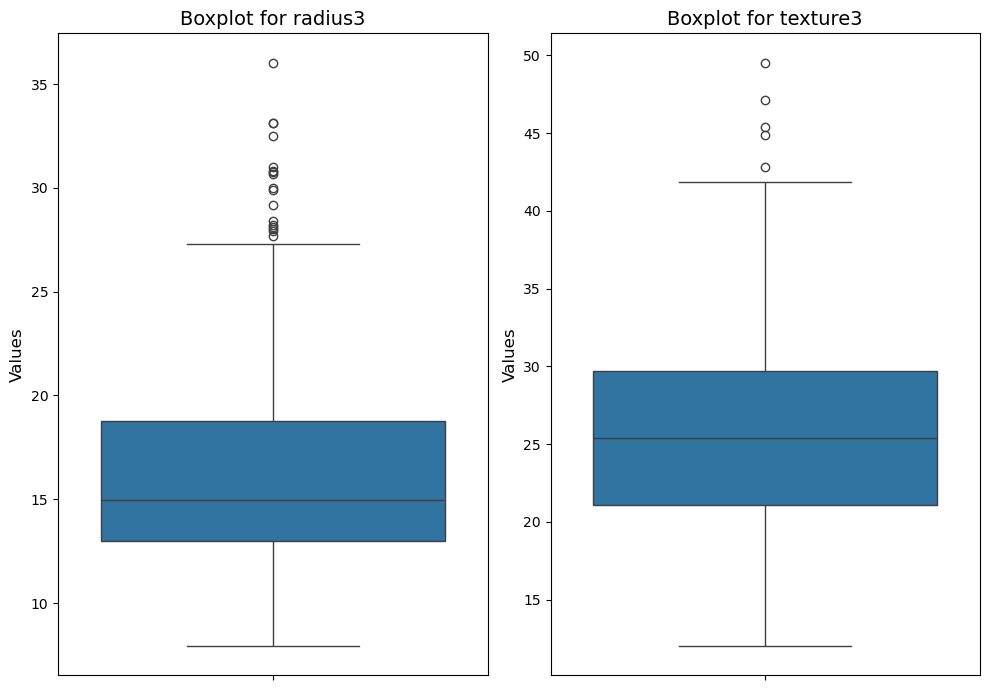

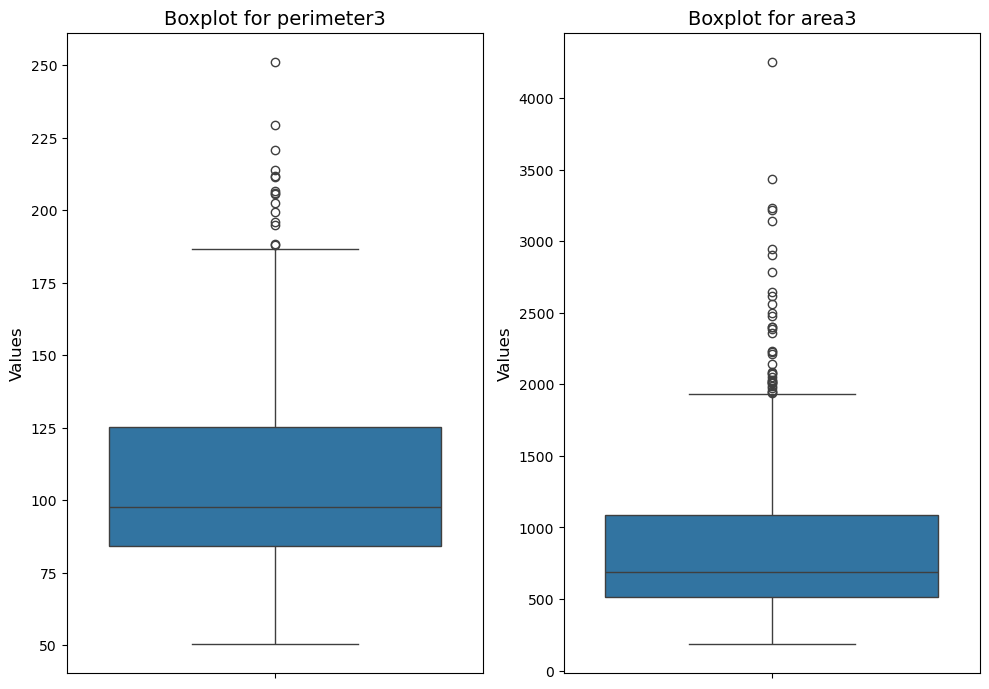

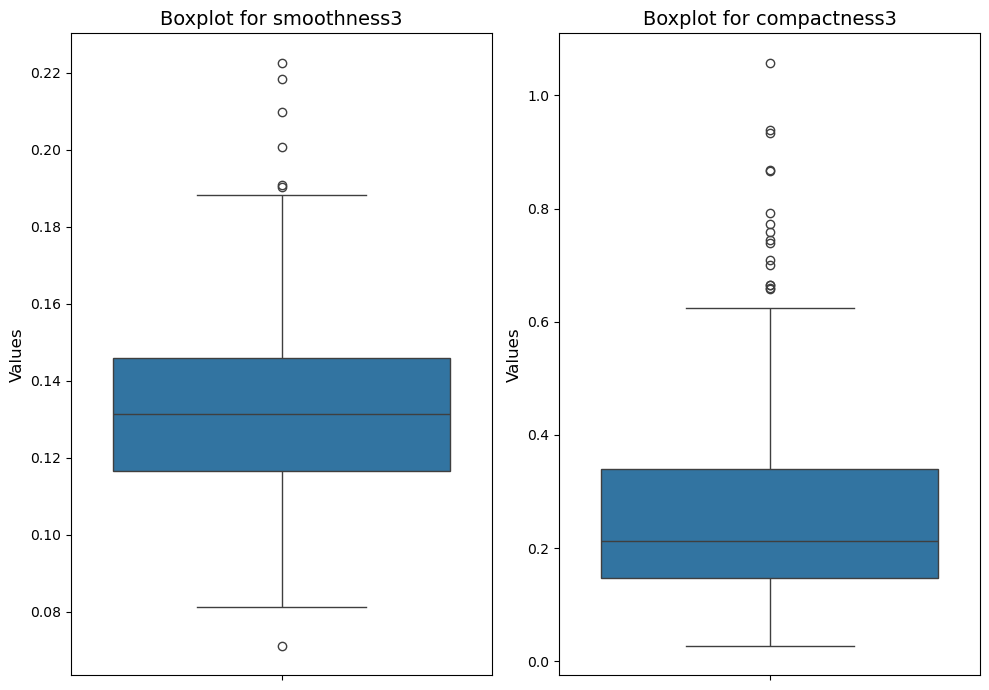

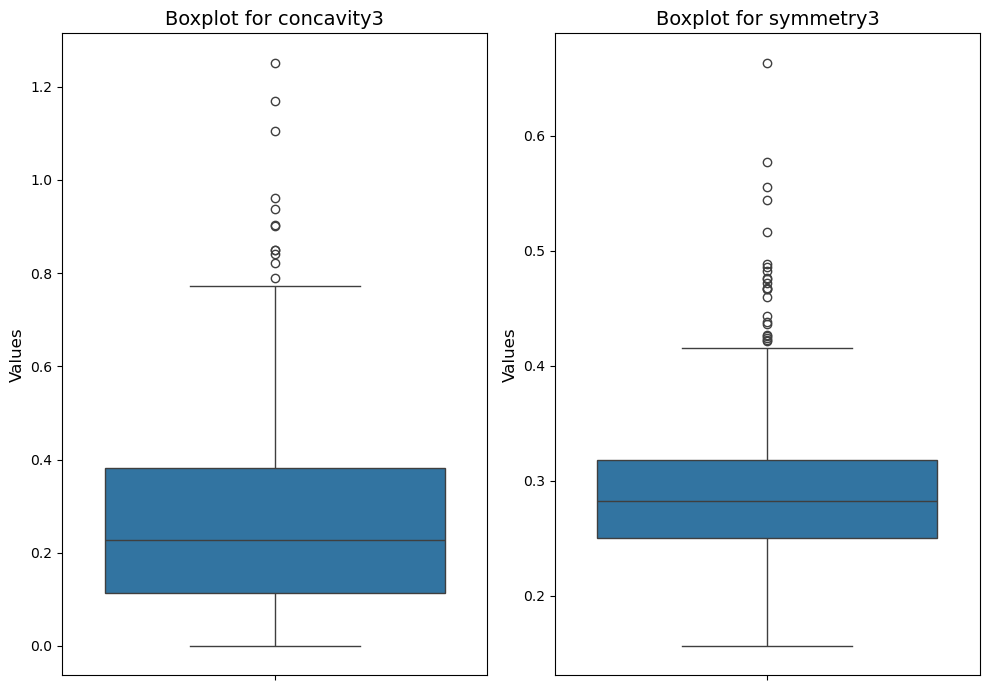

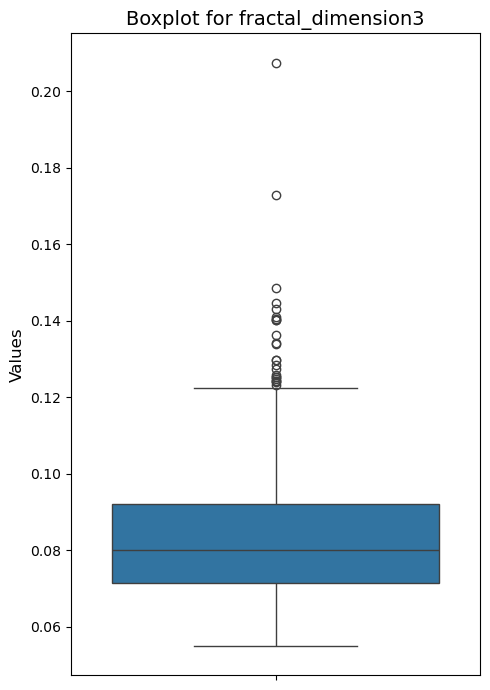

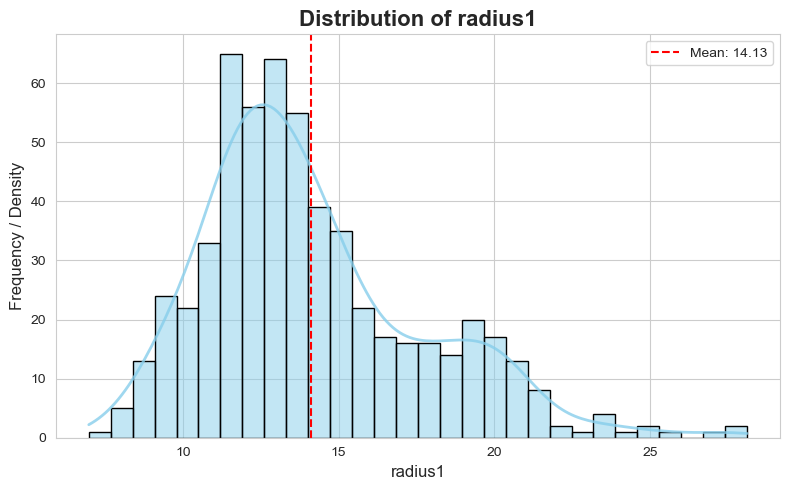

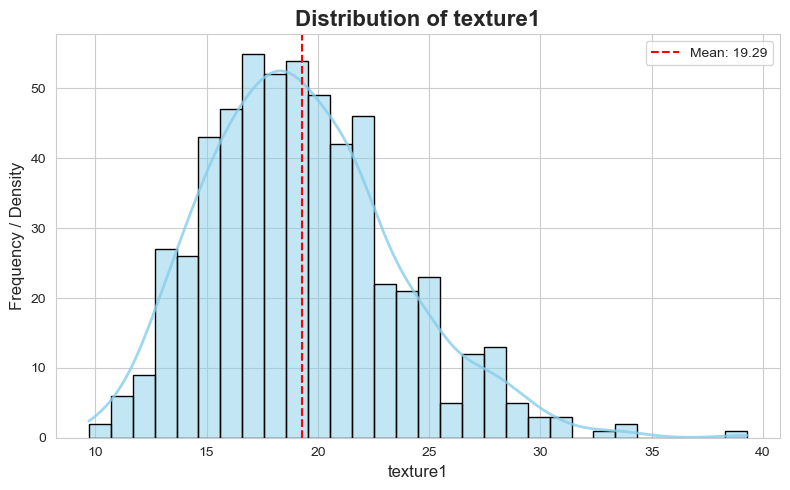

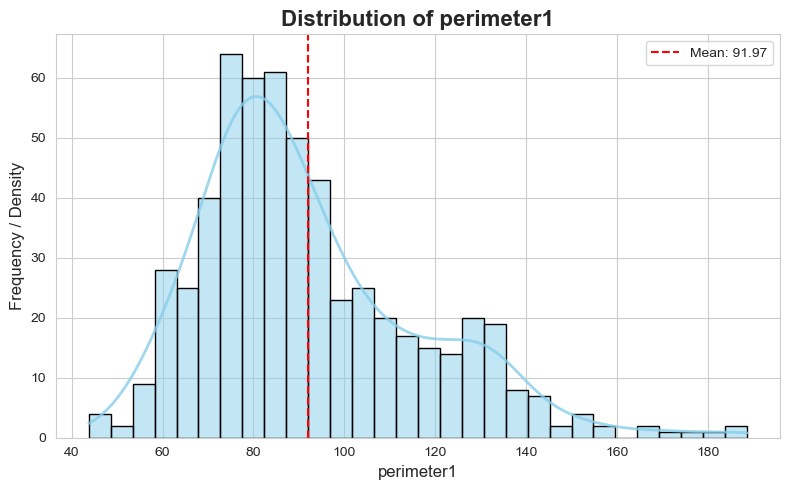

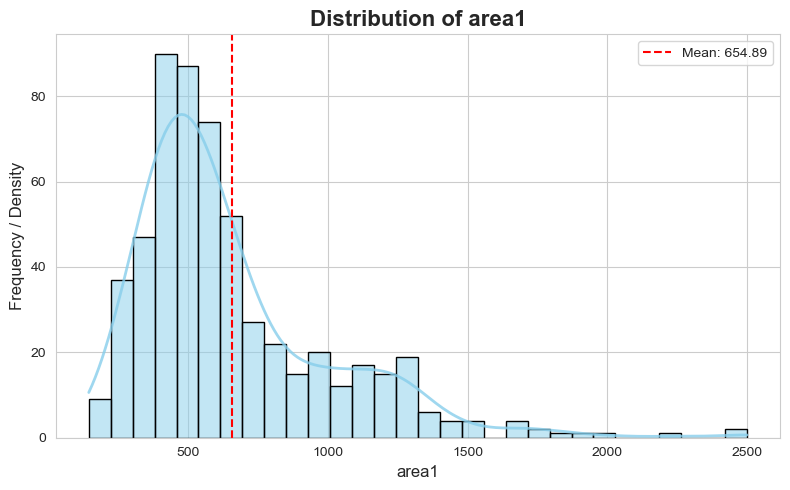

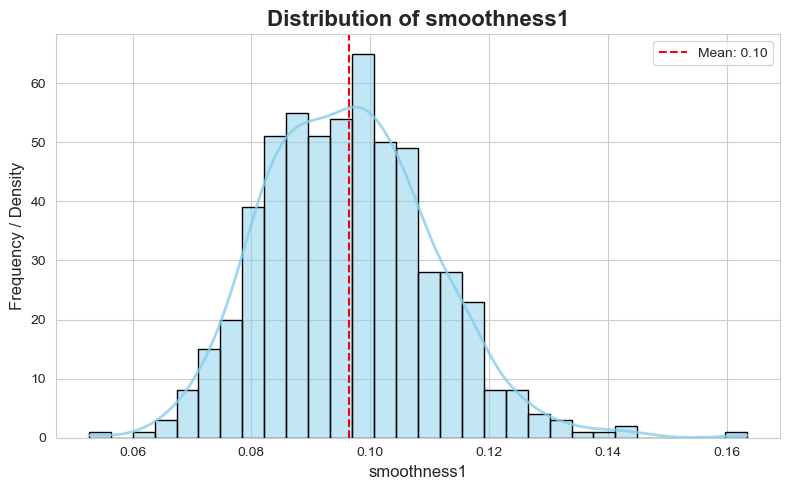

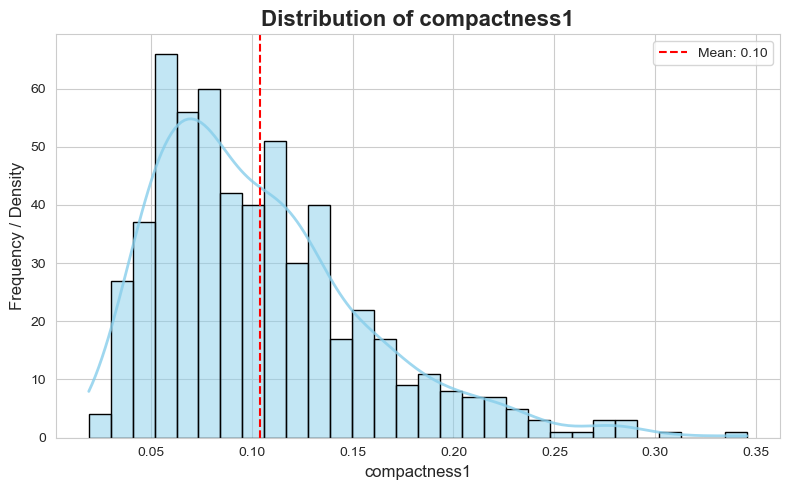

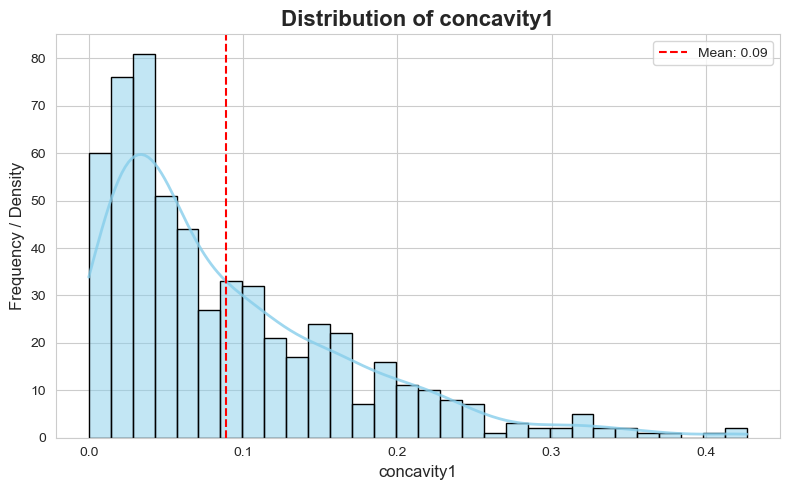

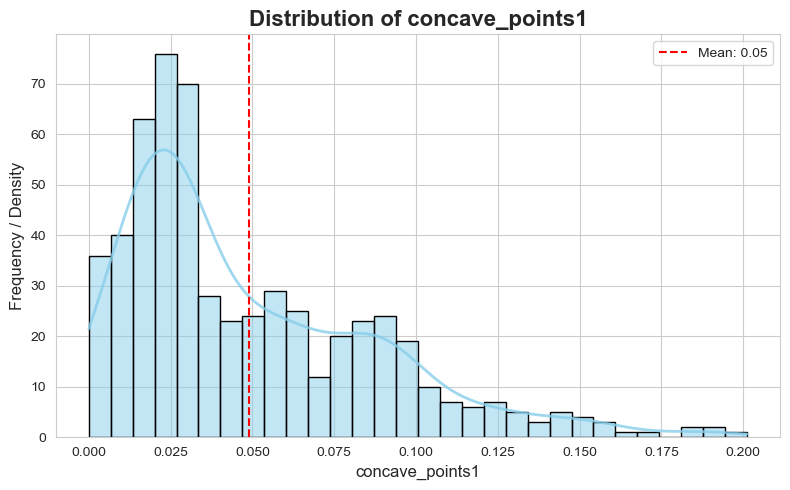

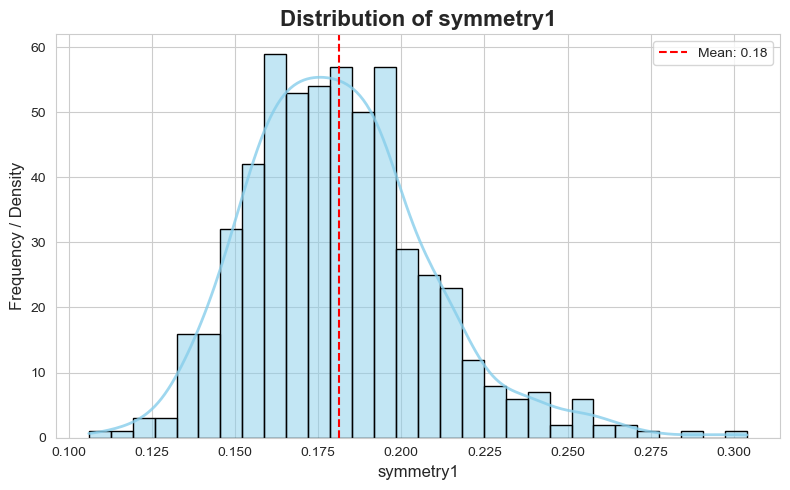

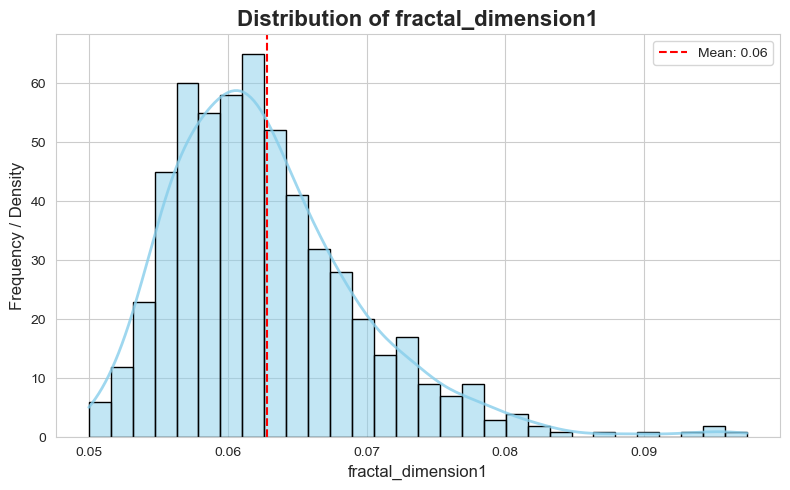

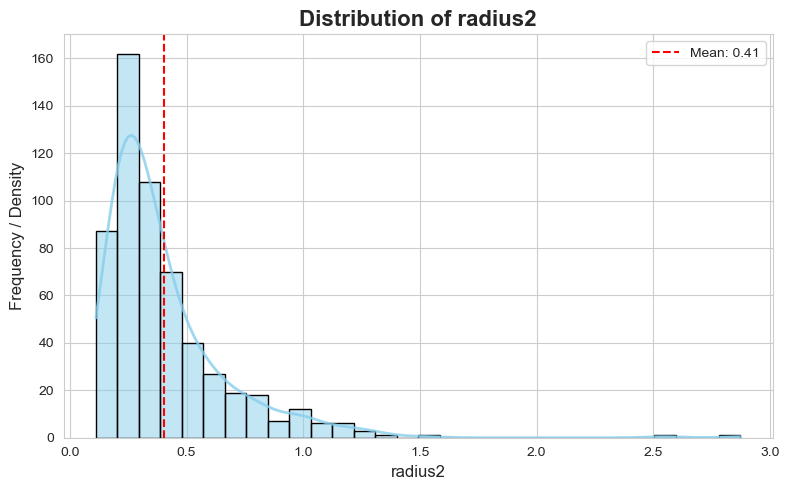

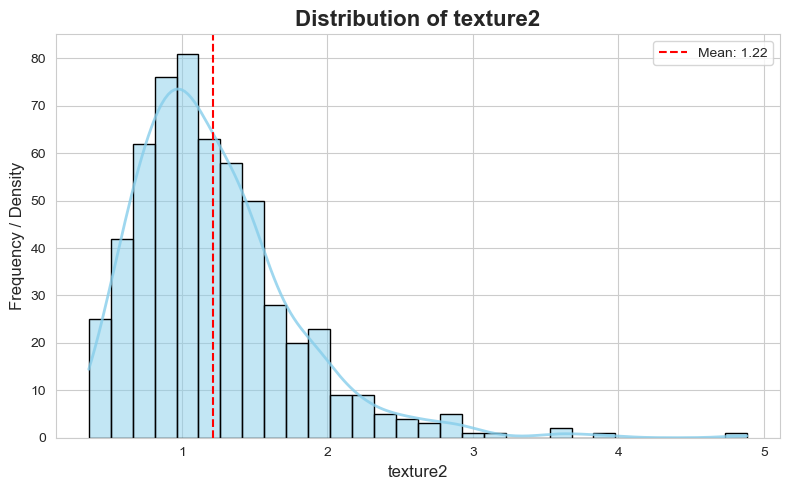

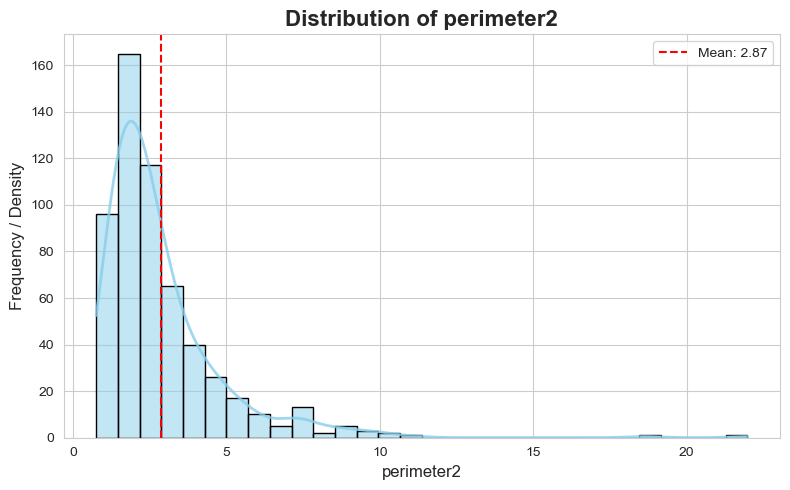

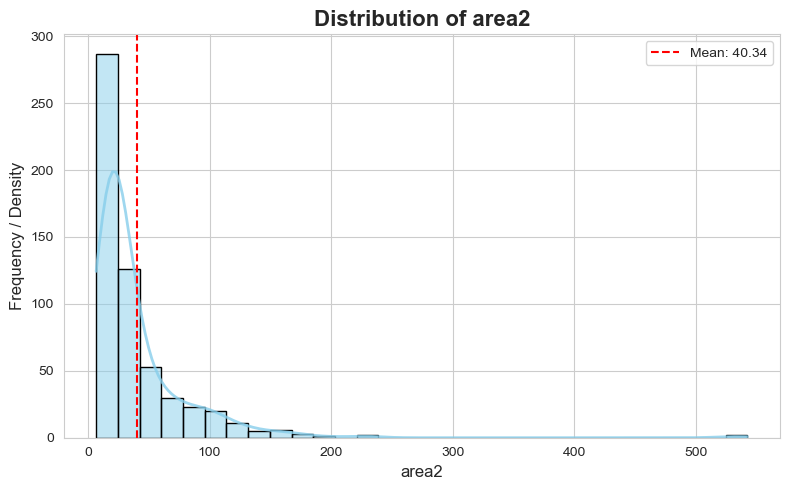

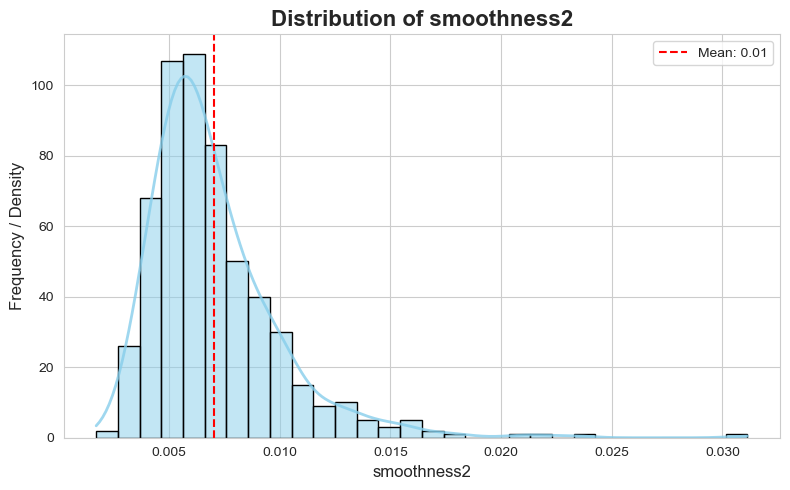

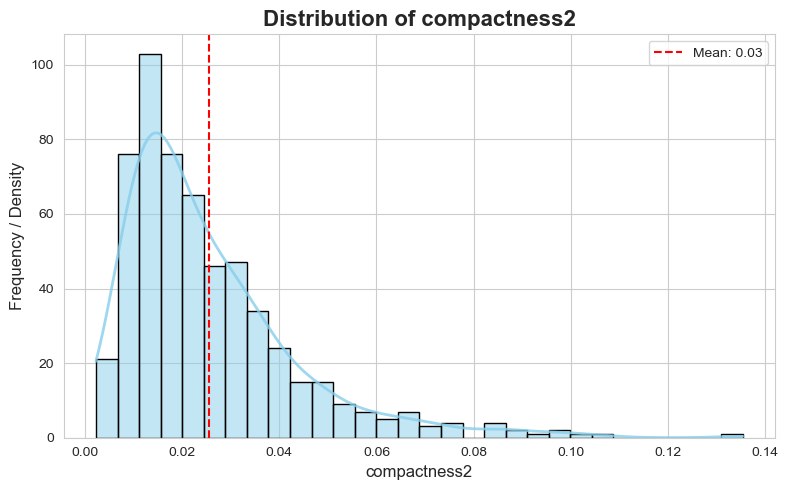

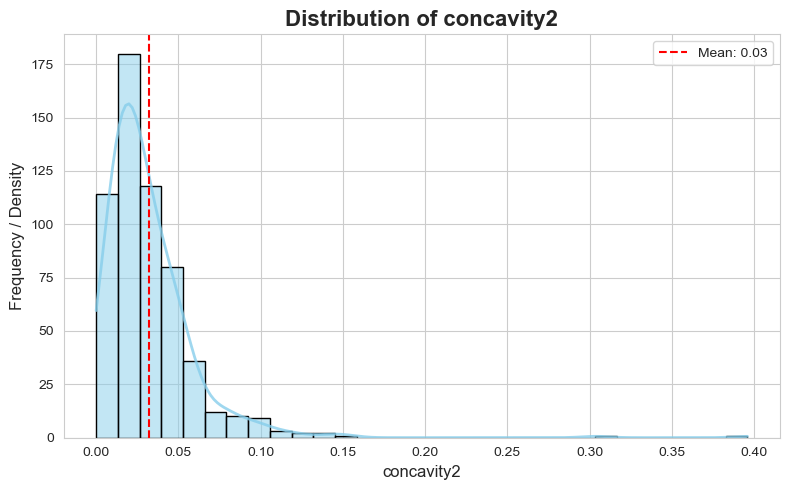

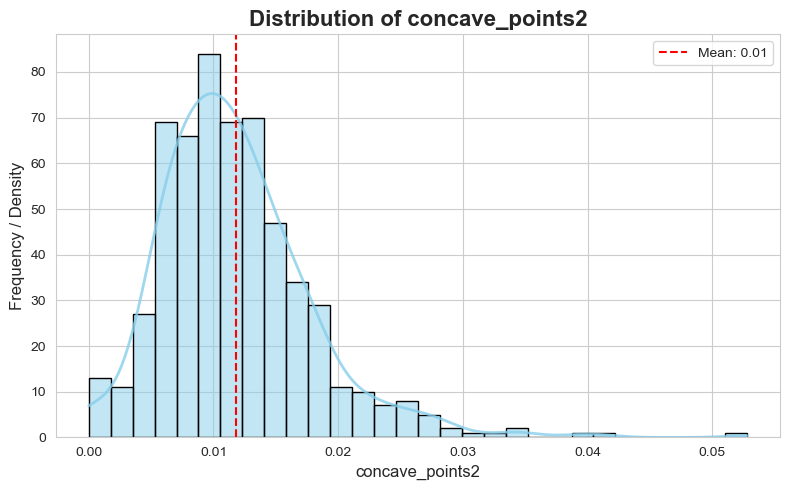

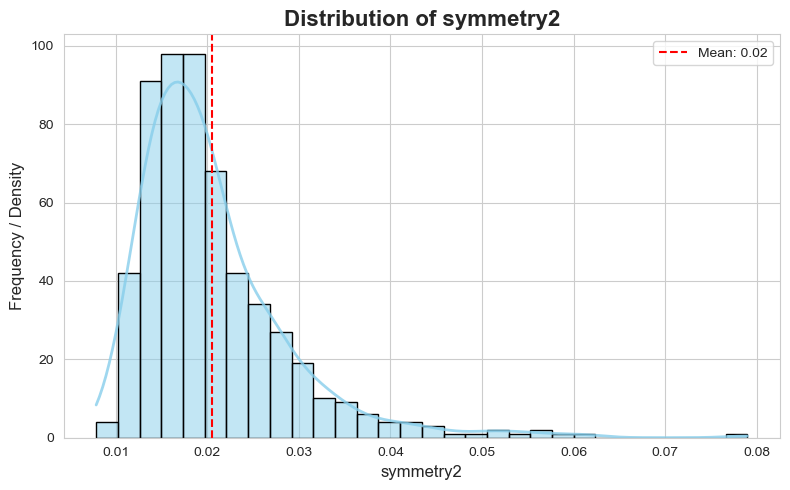

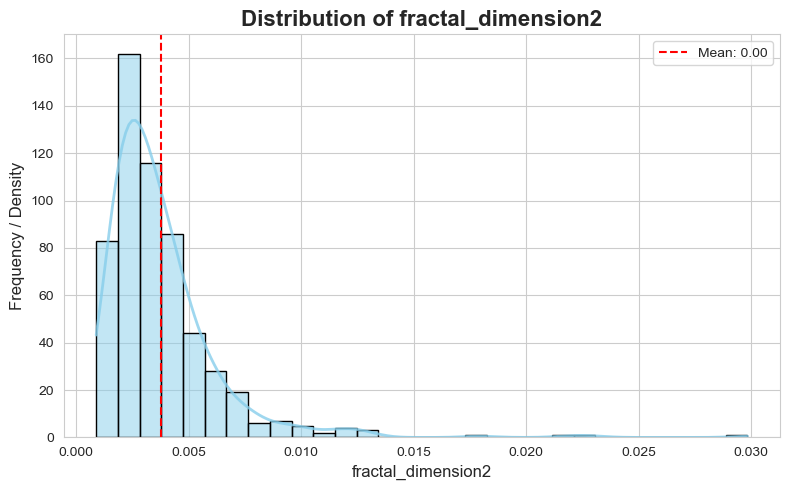

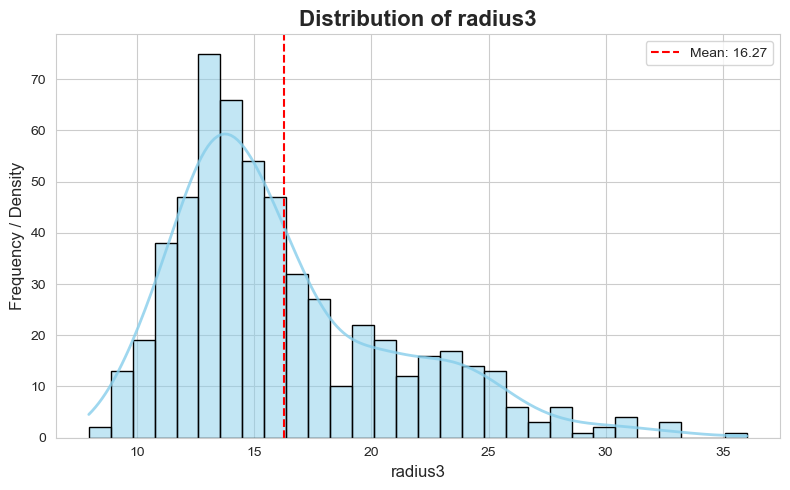

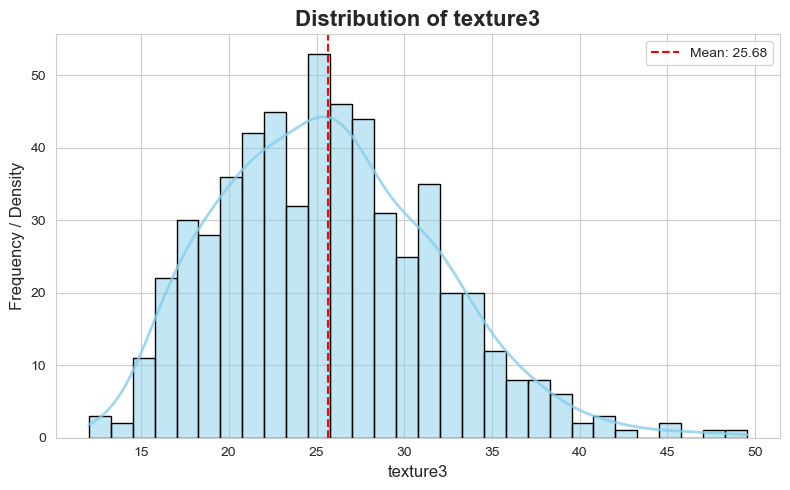

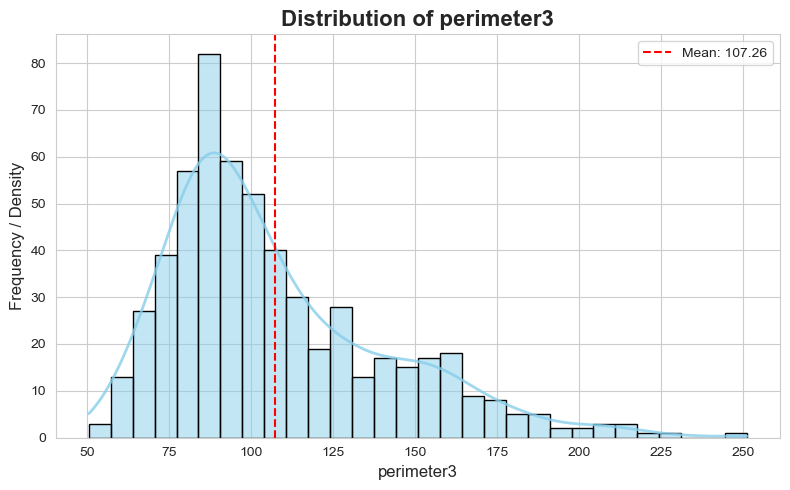

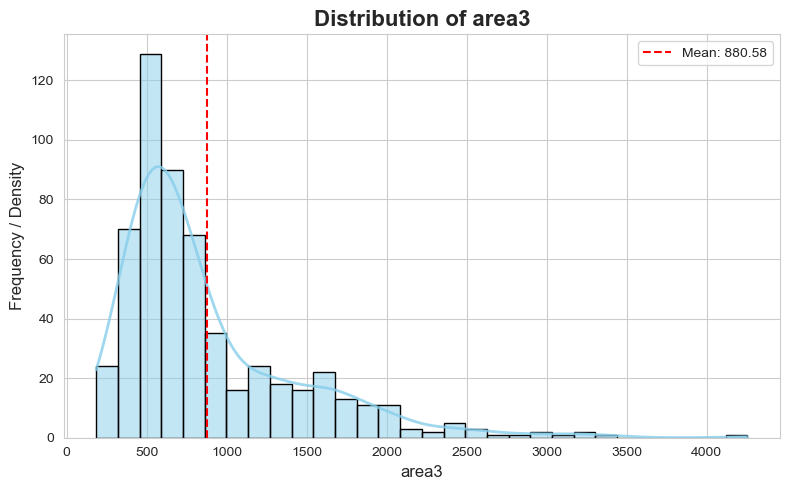

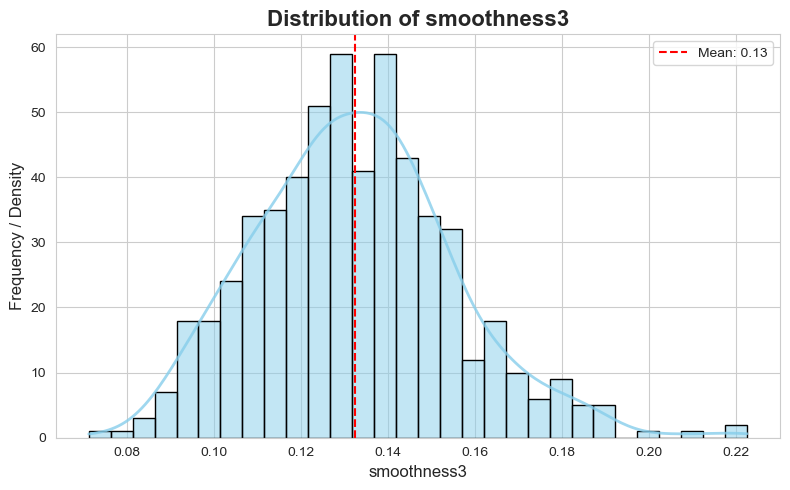

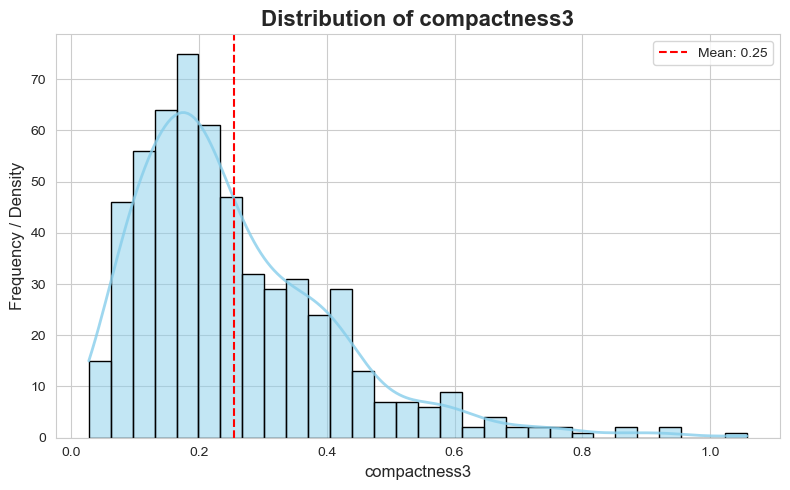

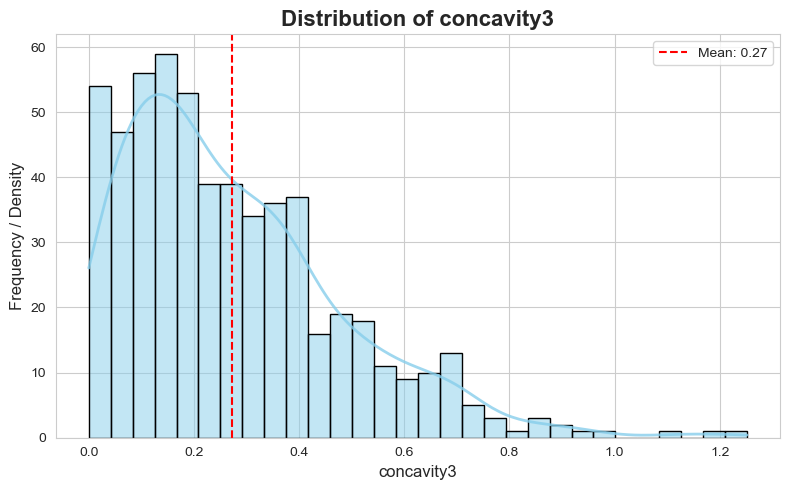

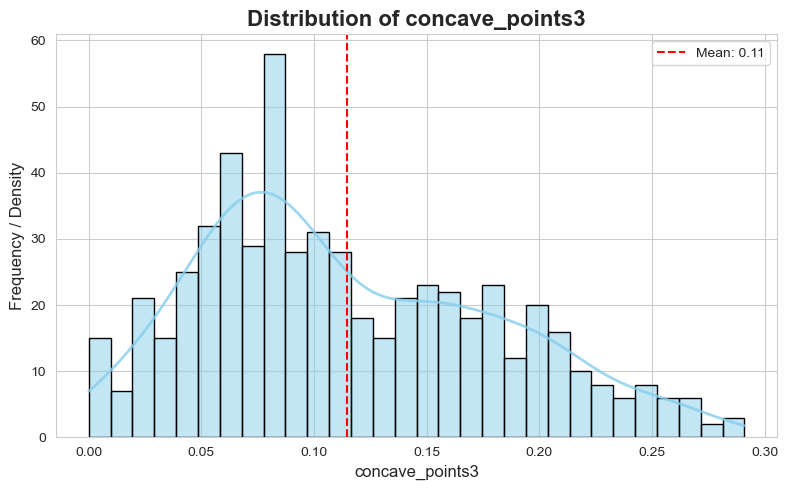

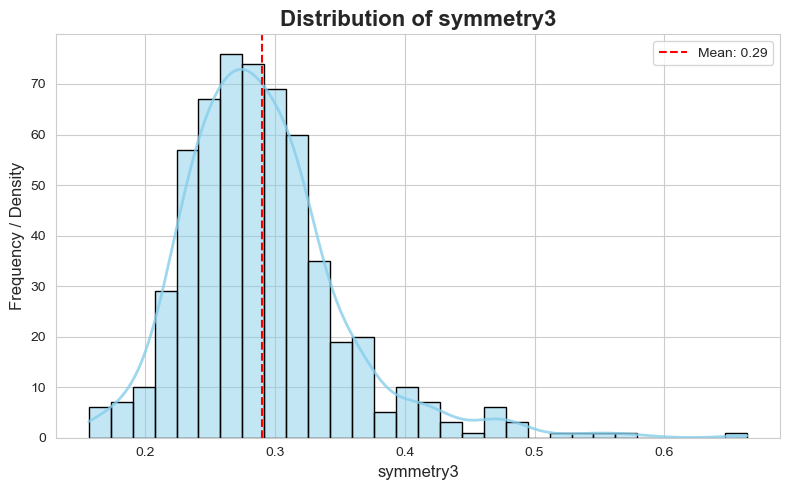

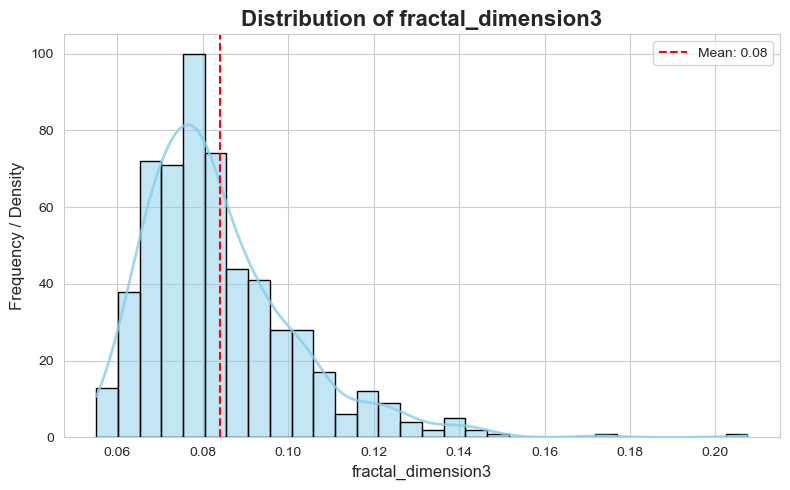

In [1]:
import scripts.data_understanding as data_understanding
import importlib
importlib.reload(data_understanding)
qual_variables, quant_variables, target_variable = data_understanding.understand_data("breast_cancer")


In [2]:
qual_variables

[]

In [3]:
quant_variables

['radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

## Phase 3 : Préparation des Données (Data Preparation)

La préparation consistera principalement à diviser nos jeux de données synthétiques.

## Phase 4 : Modélisation (Modeling)

Cette phase est le cœur du projet. Nous implémentons RLT et ajoutons les extensions requises par DSO2 (modèles embarqués variés) et DSO3 (explicabilité).

# BO 1 : data simulées 
# BO 2 : datak ol
# BO 3 : qlq exemples 
# BO 4 : data kol

### DSO1: Re-implementing the Strategy (RLT)

**Objective:** To build and validate the RLT model by reproducing the paper's experiments on the four controlled, simulated scenarios.

| Model | Dataset(s) for Development | Variables Involved | Key Parameters / Hyperparameters to Implement |
| :--- | :--- | :--- | :--- |
| **RLT (Reinforcement Learning Trees)** | **Simulated Scenarios 1-4** | **Data is programmatically generated for each scenario:**<br>- **Scenario 1 (Classification):** Signal from `X(1)` & `X(2)`; other `p-2` variables are independent noise.<br>- **Scenario 2 (Non-linear):** Non-linear signal from `X(1)` & `X(2)`; other `p-2` variables are independent noise.<br>- **Scenario 3 (Correlated):** Interaction signal from `X(50)`, `X(100)`, `X(150)`, `X(200)`; other variables are strongly correlated noise.<br>- **Scenario 4 (Linear):** Linear signal from `X(50)`, `X(100)`, `X(150)`; other variables are correlated noise.<br><br>*For all scenarios, total dimension `p` is tested at 200, 500, and 1000.* | - `M` (number of trees) = 100<br>- `nmin` = n^(¹/³)<br>- **Embedded model logic** (Extremely Randomized Trees)<br>- **Muting mechanism** (0%, 50%, 80%)<br>- **Linear combination `k` mechanism** (for k=1, 2, 5) |

### DSO2: Comparing Classical Solutions with Our Solution

**Objective:** To conduct a rigorous benchmark on all 10 real-world datasets, comparing the performance and computational efficiency of the re-implemented RLT against standard, high-performing tree-based models.

| Model | Dataset(s) for Comparison | Variables Involved | Hyperparameter Search Space | Execution Time |
| :--- | :--- | :--- | :--- | :--- |
| **RLT (Our Solution)** | **All 10 real datasets** | **For each dataset:**<br>1. Select numeric features only.<br>2. Standardize them (mean=0, var=1).<br>3. Add noisy covariates to reach a total of **p=500** features. | - `k` (linear combination size) in<br>- `muting_rate` in [0, 0.5, 0.8]<br>- `nmin` set to n¹/³ | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **Random Forests (RF)** | All 10 real datasets | *Identical data pipeline as RLT* | - `ntrees` in<br>- `mtry` (features per split) in [√p, p/3, p]<br>- `nodesize` (min leaf size) in [2, n¹/³] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **Gradient Boosting (GBM)** | All 10 real datasets | *Identical data pipeline as RLT* | - `ntrees` (boosting rounds) in (use early stopping)<br>- `learning_rate` in [0.01, 0.05, 0.1]<br>- `interaction.depth` in<br>- `n.minobsinnode` in [5, 10, n¹/³] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **XGBoost** | All 10 real datasets | *Identical data pipeline as RLT* | - `n_estimators` in (use early stopping)<br>- `learning_rate` in [0.01, 0.05, 0.1]<br>- `max_depth` in<br>- `subsample` in [0.7, 0.8, 0.9]<br>- `colsample_bytree` in [0.7, 0.8, 0.9] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|

### DSO3: Making the Strategy's Decisions Explainable

**Objective:** To diagnose and understand the behavior of the RLT model by applying global and local explainability techniques, and comparing its decision-making process to that of a standard Random Forest.

| Model | Explainability Technique | Dataset(s) for Explainability | Goal of the Technique |
| :--- | :--- | :--- | :--- |
| **RLT** & **Random Forest (RF)** | **Global Feature Importance (VIM)** | **Choose 2 contrasting datasets:**<br>1. Where RLT excelled (e.g., `concrete`).<br>2. Where RLT was less dominant (e.g., `Boston housing`). | To identify which of the 500 features the model considers most predictive *overall*, across the entire dataset. |
| **RLT** | **LIME (Local Explanations)** | Same two datasets. | To explain *why the model made a specific prediction for a single instance (row)*, providing local, case-by-case insight. |

### DSO4: Proposing and Testing Our Own Improvement

**Objective:** To validate if our proposed modifications to the RLT algorithm yield a statistically significant improvement in performance or efficiency over the original implementation.

| Model | Dataset(s) for Testing | Variables Involved | Key Parameters / Hyperparameters to Test |
| :--- | :--- | :--- | :--- |
| **RLT (Baseline)** | **All 10 real datasets** | **Identical pipeline for both models:**<br>1. Select numeric features only.<br>2. Standardize them (mean=0, var=1).<br>3. Add noisy covariates to reach **p=500**. | **Original paper's configuration:**<br>- `k` in<br>- `muting_rate` in [0, 0.5, 0.8]<br>- `embedded_model` = 'ExtremelyRandomizedTrees' |
| **Improved RLT** | **All 10 real datasets** | *Identical data pipeline as the baseline for a fair comparison.* | **Test one or more proposed improvements:**<br>- **Idea 1:** Change `embedded_model` to 'LightGBM'.<br>- **Idea 2:** Change `muting_strategy` to 'adaptive_quantile'.<br>- **Idea 3:** Change `linear_combination_method` to 'ridge_weighted'.<br><br>*(All other parameters remain identical to the baseline)* |

## Phase 5 : Évaluation (Evaluation)

Nous validons ici les trois DSOs de manière distincte.

In [ ]:
# === Validation DSO1 : Reproduction RLT Standard ===
# Entraîner RLT (mode standard) sur 'Checkerboard' et comparer avec RandomForest sklearn.
# Critère : RLT doit avoir une accuracy significativement supérieure grâce au 'combsplit'.

# === Validation DSO2 : Benchmarking des Modèles Embarqués ===
# Comparer RLT_Standard (embedded='rf') vs RLT_Boosted (embedded='lightgbm').
# Mesurer : Temps d'entraînement et Précision/MSE sur les données bruitées.
# Critère : RLT_Boosted doit montrer un gain de performance ou de vitesse.

# === Validation DSO3 : Qualité de l'Explicabilité ===
# Utiliser .explain() sur le jeu de données bruité.
# Vérifier si la heatmap générée attribue une importance proche de 0 aux variables de bruit.
# Visualiser une 'Feature Heatmap' pour quelques prédictions.

## Phase 6 : Déploiement (Deployment)

Préparation du modèle pour l'intégration, en mettant l'accent sur l'explicabilité (BO3).

### 6.1 Sauvegarde du Modèle Optimisé
Sauvegarder la meilleure version du modèle (probablement celle issue de DSO2).

### 6.2 Interface Streamlit (avec XAI)
**Objectif :** Démonstrateur interactif incluant la transparence.

**Fonctionnalités :**
- Inputs utilisateur.
- Affichage Prédiction.
- **Feature Heatmap (BO3) :** Afficher graphiquement quelles variables ont poussé la décision (output de `.explain()`).

### 6.3 API FastAPI
**Objectif :** Intégration système.

**Endpoint :** `POST /predict`
- **Input :** Données JSON.
- **Output :** `{"prediction": value, "explanation": {feature_contributions}}`
- L'API retourne non seulement le résultat mais aussi le "pourquoi" (BO3).